In [91]:
import numpy as np
import mnist
import matplotlib.pyplot as plt

学習データの生成

In [92]:
mn = mnist.MNIST(pathMNIST = './data/mnist')
# 学習データ
datL = mn.getImage('L')/255
labL = mn.getLabel('L')
labL_one = np.identity(10)[labL] # クラス番号をtn=0,1に変換
# テストデータ
datT = mn.getImage('T')/255
labT = mn.getLabel('T')
labT_one = np.identity(10)[labT]
# データの大きさ, 次元
NL, d = datL.shape
NT, d = datT.shape

# データ末尾にバイアス項追加
datL = np.hstack([datL,np.ones(NL).reshape(-1, 1)])
datT = np.hstack([datT,np.ones(NT).reshape(-1, 1)])

# シグモイド関数
def s(y):
    expy = np.exp(y)
    return expy/np.sum(expy)

ロジスティック回帰モデル

In [128]:
def logistic(eta, N): # 学習率,繰り返し回数
    K = 10 # クラス数
    D = d+1 # パラメータの個数
    w =  np.random.rand(K, D)*0.01 # パラメータを適当な乱数で初期化する

    # グラフ描画用
    div = N/50 # グラフの点を50個
    data = np.empty(int(N/div)+1)
    count = 0
    # print(w)

    for i in range(N):
        n = np.random.randint(NL) # 学習データの中から一つをランダムに選択
        t = labL_one[n] # 教師信号
        z = s(datL[n]@w.T) # Xnに対するそれぞれのクラスモデルの出力[z0,...,z9]を計算
        # それぞれのパラメータの値を更新
        w = w - eta*(z-t).reshape(-1,1)@datL[n].reshape(-1,D)

        # 一定回数毎に交差エントロピーを計算
        if i == 0 or i % div == div-1:
            Z = s(datL@w.T)
            H = -labL_one*np.log(Z) # hnを計算
            data[count] = np.sum(H)
            count+=1
            # print(np.sum(H), i+1)
    
    # 識別したクラス値が最も大きいクラスとして識別
    corrL = np.argmax(datL@w.T,axis=1)
    corrT = np.argmax(datT@w.T,axis=1)
    print('eta={}, N={}'.format(eta,N))
    print('学習データの識別率',np.mean(corrL==labL)) # 学習データの識別率
    print('テストデータの識別率',np.mean(corrT==labT)) # テストデータの識別率
    # グラフ描画
    plt.plot(np.arange(0,N+1,div), data ,marker="o")
    plt.xlabel('N') # 繰り返し回数
    plt.ylabel('H') # 交差エントロピー
    plt.title('eta={}'.format(eta))
    plt.show()

    


eta=0.0001, N=53000
学習データの識別率 0.8432833333333334
テストデータの識別率 0.8538


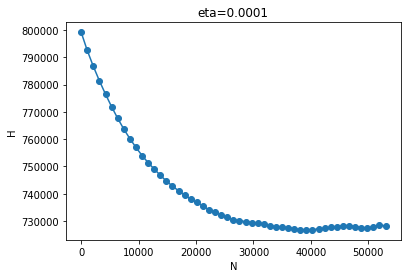

In [137]:
logistic(eta=0.0001, N=53000)

# 実験結果  
交差エントロピーは73,000程度が最小だった。  
繰り返しにつれて交差エントロピーが上昇に転じるが、識別率も上昇していた。  
学習データとテストデータの識別率は総じてテストデータの方が高かった。  

実験

eta=5e-05, N=50000
学習データの識別率 0.81395
テストデータの識別率 0.8225


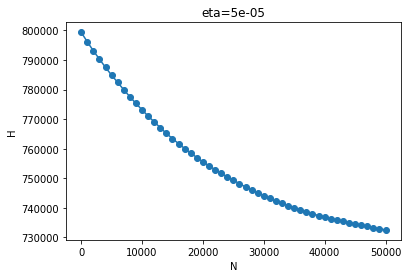

eta=0.0001, N=50000
学習データの識別率 0.8390333333333333
テストデータの識別率 0.8463


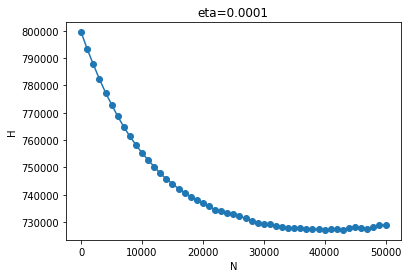

eta=0.00015000000000000001, N=50000
学習データの識別率 0.8531166666666666
テストデータの識別率 0.8634


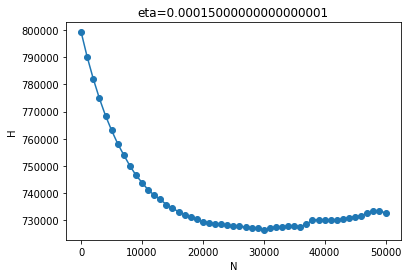

eta=0.0002, N=50000
学習データの識別率 0.85895
テストデータの識別率 0.8694


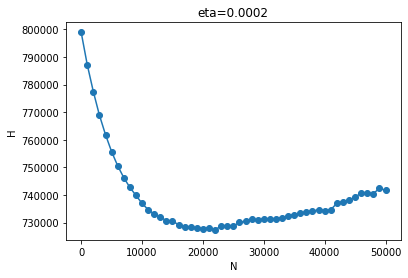

In [129]:
# etaを調節
for kai in range(1,5):
    logistic(eta=kai*0.00005, N=50000)

eta=0.0001, N=45000
学習データの識別率 0.8375666666666667
テストデータの識別率 0.8466


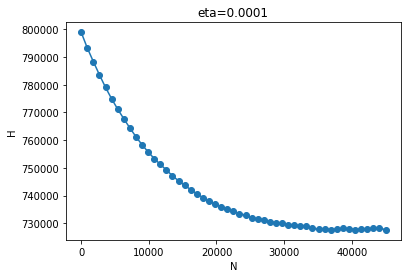

eta=0.0001, N=46000
学習データの識別率 0.8383833333333334
テストデータの識別率 0.8472


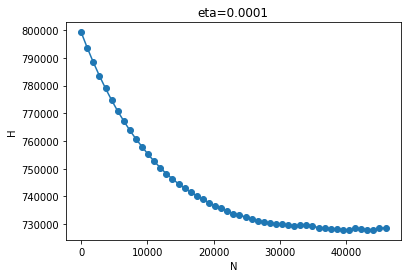

eta=0.0001, N=47000
学習データの識別率 0.8402166666666666
テストデータの識別率 0.849


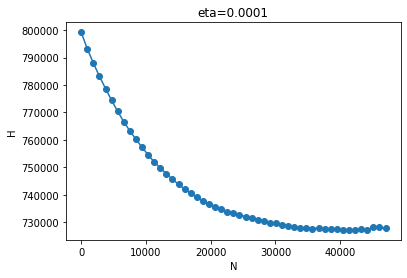

eta=0.0001, N=48000
学習データの識別率 0.84315
テストデータの識別率 0.8516


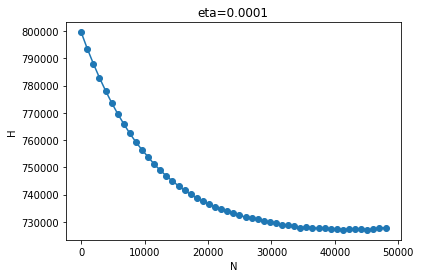

eta=0.0001, N=49000
学習データの識別率 0.8401833333333333
テストデータの識別率 0.8492


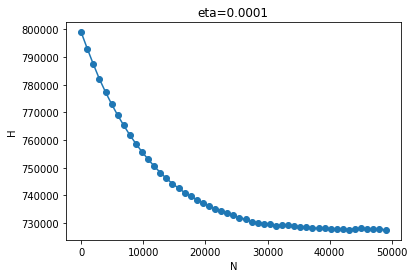

eta=0.0001, N=50000
学習データの識別率 0.84155
テストデータの識別率 0.8493


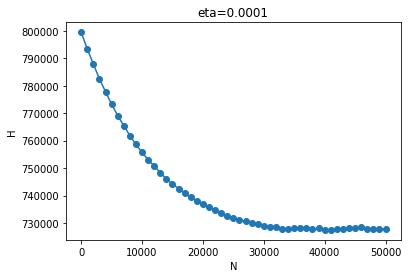

eta=0.0001, N=51000
学習データの識別率 0.84185
テストデータの識別率 0.8498


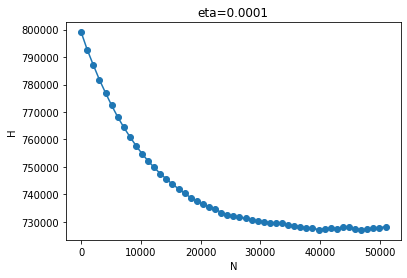

eta=0.0001, N=52000
学習データの識別率 0.8410166666666666
テストデータの識別率 0.8503


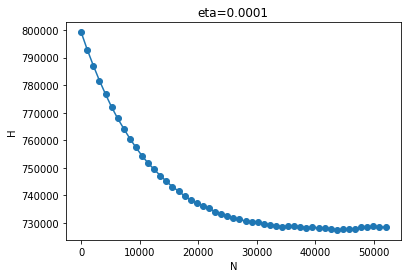

eta=0.0001, N=53000
学習データの識別率 0.8415333333333334
テストデータの識別率 0.8512


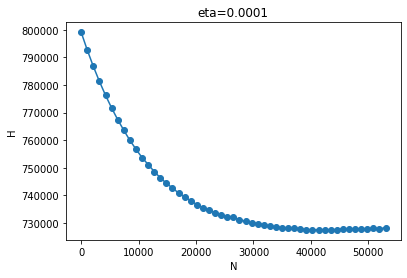

eta=0.0001, N=54000
学習データの識別率 0.8393
テストデータの識別率 0.8491


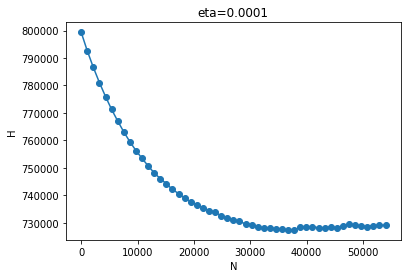

In [132]:
# 繰り返し回数を調節
for kai in range(-5,5):
    logistic(eta=0.0001, N=50000+kai*1000)

eta=1.9999999999999998e-05, N=53000
学習データの識別率 0.7745333333333333
テストデータの識別率 0.7876


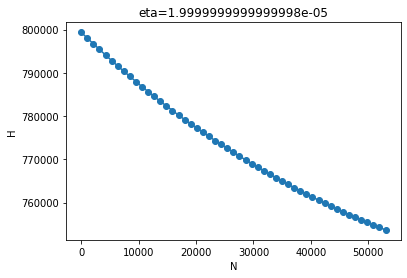

eta=3.9999999999999996e-05, N=53000
学習データの識別率 0.8095833333333333
テストデータの識別率 0.8213


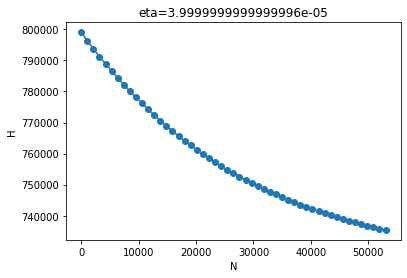

eta=6e-05, N=53000
学習データの識別率 0.8227333333333333
テストデータの識別率 0.8325


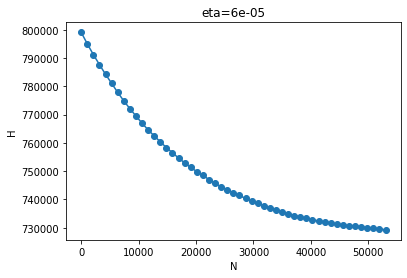

eta=8e-05, N=53000
学習データの識別率 0.8373166666666667
テストデータの識別率 0.8451


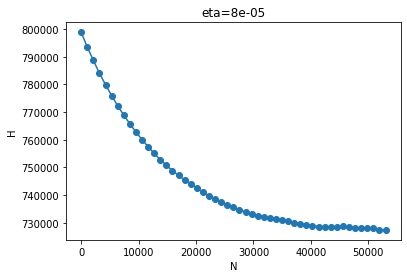

eta=0.0001, N=53000
学習データの識別率 0.8419666666666666
テストデータの識別率 0.8522


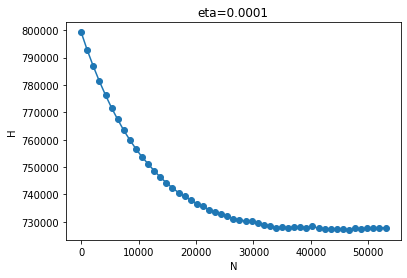

eta=0.00012, N=53000
学習データの識別率 0.8493833333333334
テストデータの識別率 0.8593


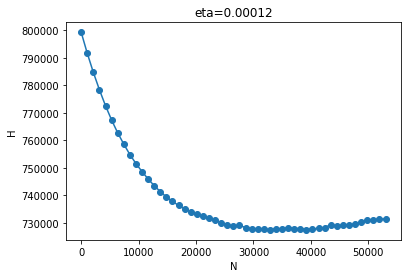

eta=0.00014000000000000001, N=53000
学習データの識別率 0.8514333333333334
テストデータの識別率 0.8612


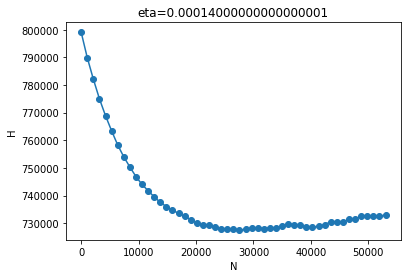

eta=0.00016, N=53000
学習データの識別率 0.8574833333333334
テストデータの識別率 0.8659


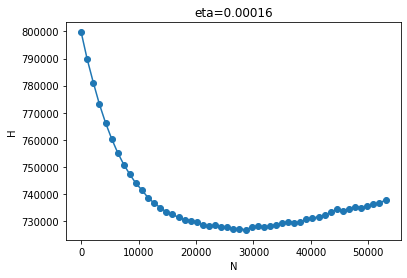

eta=0.00018, N=53000
学習データの識別率 0.8608333333333333
テストデータの識別率 0.8703


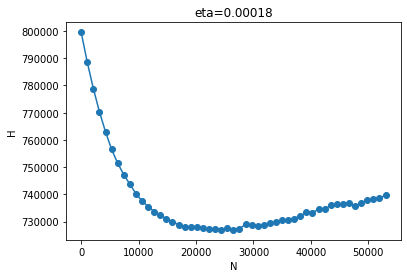

In [135]:
# etaをより細かく調節
for kai in range(-4,5):
    logistic(eta=0.0001+(kai*0.00002), N=53000)

eta=0.0001, N=5000000
学習データの識別率 0.92085
テストデータの識別率 0.9212


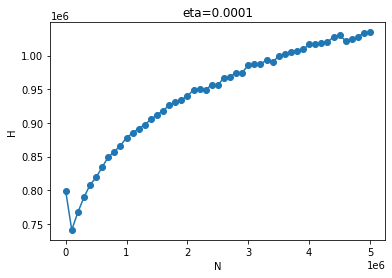

In [141]:
logistic(eta=0.0001, N=5000000)

メモ

In [89]:
# 識別したクラス値が最も大きいクラスとして識別
corrL = np.argmax(datL@w.T,axis=1)
corrT = np.argmax(datT@w.T,axis=1)
print('学習データの識別率',np.mean(corrL==labL)) # 学習データの識別率
print('テストデータの識別率',np.mean(corrT==labT)) # テストデータの識別率



学習データの識別率 0.8454
テストデータの識別率 0.8546


交差エントロピーのグラフ

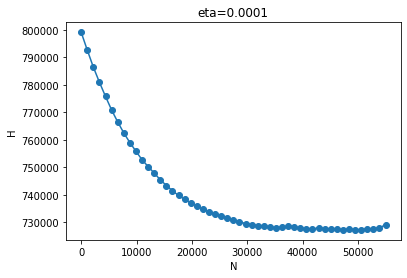

In [90]:
plt.plot(np.arange(0,N+1,div), data ,marker="o")
plt.xlabel('N') # 繰り返し回数
plt.ylabel('H') # 交差エントロピー
plt.title('eta={}'.format(eta))
plt.show()

繰り返し回数10万回での交差エントロピーのグラフ

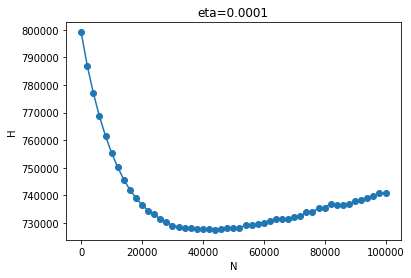

In [84]:
plt.plot(np.arange(0,N+1,div), data ,marker="o")
plt.xlabel('N')
plt.ylabel('H')
plt.title('eta={}'.format(eta))
plt.show()